In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "C:\\Users\\dongh\\Downloads\\MBD project\\"

In [3]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [4]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [5]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [7]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [8]:
cali_inf = canada.loc[:,["Time","Quebec"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,Quebec
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [9]:
cali_imp = impact.loc[impact.State == "Quebec",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,100,Quebec
1,3/16/2020,100,Quebec
2,3/17/2020,100,Quebec
3,3/17/2020,98,Quebec
4,3/18/2020,100,Quebec


In [10]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [11]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,100
1,3/16/2020,100
2,3/17/2020,100
3,3/17/2020,98
4,3/18/2020,100


In [12]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,95.5
1,10/10/2020,86.0
2,10/11/2020,49.0
3,10/12/2020,14.5
4,10/13/2020,85.0
...,...,...
210,9/5/2020,79.0
211,9/6/2020,75.0
212,9/7/2020,12.0
213,9/8/2020,83.5


In [15]:
cali_inf.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\qb_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\qb_imp.csv", index=False, header=True)

In [72]:
cali = pd.read_csv(data_dir + "qb.csv")
cali.head()

,Time,Quebec,PercentOfBaseline
0,3/16/2020,26,100.0
1,3/17/2020,24,99.0
2,3/18/2020,20,99.0
3,3/19/2020,27,97.5
4,3/20/2020,18,99.5


In [73]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [74]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [75]:
cali = cali.iloc[1:,:]
cali.head()

,index,Quebec,PercentOfBaseline,change
1,1,240.6,80.8,9.460870
2,2,417.6,58.8,0.735661
3,3,534.2,58.0,0.279215
4,4,962.2,52.1,0.801198
5,5,667.2,36.2,-0.306589


In [76]:
N = 3
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()

In [77]:
cali = tmp1[:]
cali.head()

,PercentOfBaseline,change
1,80.8,0.801198
2,58.8,-0.306589
3,58.0,0.109712
4,52.1,0.260400
5,36.2,-0.144021


In [78]:
cali.to_csv(r"C:\\Users\\dongh\\Downloads\\MBD project\\qb2.csv", index=False, header=True)

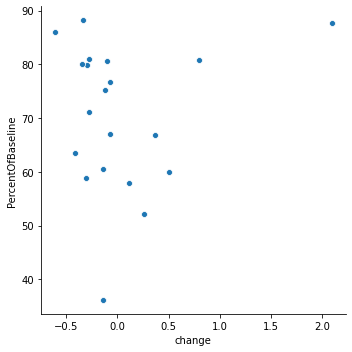

In [79]:
sns.relplot("change","PercentOfBaseline",data = tmp1)

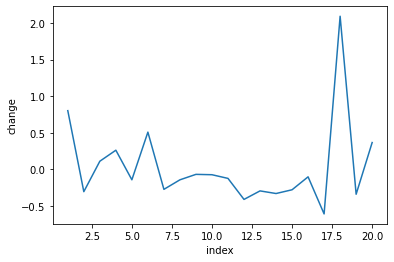

In [80]:
cali = cali.reset_index()
sns.lineplot("index","change",data = cali)

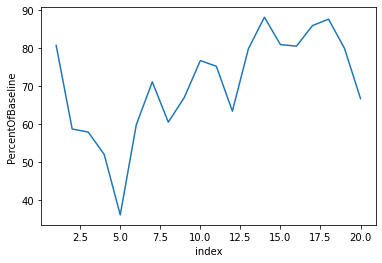

In [81]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [82]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1050
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                       0.749
Time:                        01:16:19   Log-Likelihood:                         -17.350
No. Observations:                  20   AIC:                                      36.70
Df Residuals:                      19   BIC:                                      37.70
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0006      0.002      0.324      0.749      -0.003       0.004
==============================================================================
Omnibus:                       26.009   Durbin-Watson:                   2.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.927
Skew:                           2.256   Prob(JB):                     1.30e-09
Kurtosis:                       8.363   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""